In [2]:
import matplotlib.pyplot as plt
import IPython

### Test FastPitch

In [24]:
from models.fastpitch import FastPitch
model = FastPitch('pretrained/fastpitch_ar_adv.pth')
model = model.cuda()

mel_spec = model.ttmel("اَلسَّلامُ عَلَيكُم يَا صَدِيقِي")
# mel_spec = model.ttmel("أَهلاً وَسَهلاً")

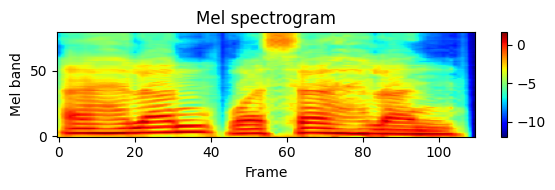

In [29]:
fig, ax = plt.subplots(figsize=(6, 2))
im = ax.imshow(mel_spec.cpu(), origin='lower', aspect='auto', cmap='jet')
fig.colorbar(im, ax=ax)
ax.set_xlabel('Frame')
ax.set_ylabel('Mel band')
ax.set_title("Mel spectrogram")
fig.tight_layout()

In [41]:
from models.fastpitch import FastPitch2Wave
model = FastPitch2Wave('pretrained/fastpitch_ar_adv.pth')
model = model.cuda()

wave, mel_spec = model.tts("اَلسَّلامُ عَلَيكُم يَا صَدِيقِي", return_mel=True, denoise=0.005)
# wave, mel_spec = model.tts("أَهلاً وَسَهلاً", return_mel=True)

print("Audio output (FastPitch2)")
IPython.display.Audio(data=0.5*wave, rate=22050, normalize=False)

Audio output (FastPitch2)


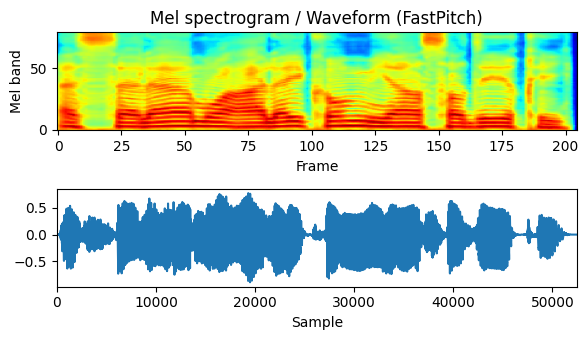

In [37]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 3.5))
ax1.imshow(mel_spec.cpu(), origin='lower', aspect='auto', cmap='jet')
ax1.set_xlabel('Frame')
ax1.set_ylabel('Mel band')
ax1.set_title("Mel spectrogram / Waveform (FastPitch)")
ax2.plot(wave)
ax2.set_xlim(0, len(wave))
ax2.set_xlabel('Sample')
fig.tight_layout()

### Test Tacotron2

In [40]:
from models.tacotron2 import Tacotron2Wave
model = Tacotron2Wave('pretrained/tacotron2_ar_adv.pth')
model = model.cuda()

wave, mel_spec = model.tts("اَلسَّلامُ عَلَيكُم يَا صَدِيقِي", return_mel=True, denoise=0.005)
# wave, mel_spec = model.tts("أَهلاً وَسَهلاً", return_mel=True)

print("Audio output (Tacotron2)")
IPython.display.Audio(data=0.5*wave, rate=22050, normalize=False)

Audio output (Tacotron2)


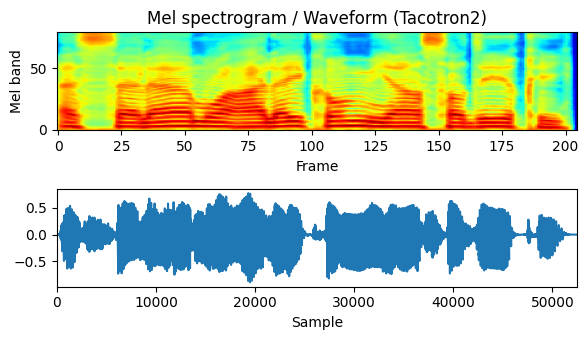

In [38]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 3.5))
ax1.imshow(mel_spec.cpu(), origin='lower', aspect='auto', cmap='jet')
ax1.set_xlabel('Frame')
ax1.set_ylabel('Mel band')
ax1.set_title("Mel spectrogram / Waveform (Tacotron2)")
ax2.plot(wave)
ax2.set_xlim(0, len(wave))
ax2.set_xlabel('Sample')
fig.tight_layout()